In [1]:
import datetime

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import torch
from gymnasium.wrappers import RecordVideo

# https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html
from stable_baselines3 import DQN

In [2]:
MAX_EPISODES_STEPS = 1000


def make_env():
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    env._max_episode_steps = MAX_EPISODES_STEPS
    np.random.seed(13)
    env.reset()
    return env

c:\Users\admin\Coding\research\rl-training-2025-codes\.venv\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


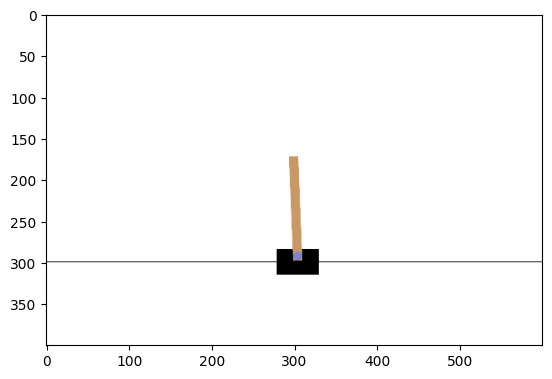

In [3]:
env = make_env()
env.reset()
plt.imshow(env.render())

In [4]:
policy_kwargs = dict(activation_fn=torch.nn.ReLU, net_arch=[192, 256, 64])

In [5]:
model = DQN("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [15]:
model.learn(total_timesteps=4e4, log_interval=500, progress_bar=True)

Output()

In [7]:
model.predict([0, 1, 1, 1], deterministic=True)

(array(1, dtype=int64), None)

In [17]:
env.close()
env = make_env()
env.reset()
timestamp = int(datetime.datetime.now().timestamp())
timestamp = int(datetime.datetime.now().timestamp())
env = RecordVideo(env=env, video_folder="./video", name_prefix=timestamp)
state, _ = env.reset()
reward = 0
idx = 0
while True:
    action, _ = model.predict(state)
    state, r, done, _, _ = env.step(action)
    reward += r
    if done or idx > MAX_EPISODES_STEPS:
        print("Got reward: {}".format(reward))
        break
    idx += 1


env.close()

Got reward: 160.0
